## Z-점수 기반 이상치 탐지 실습

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

### 시계열 데이터 생성, 이상치 추가, 데이터 프레임 생성

In [2]:
# 시계열 데이터 생성
dates = pd.date_range(start='2023-01-01', periods=100, freq='D')
values = np.random.randn(100) * 10 # 정규 분포를 다르는 데이터 생성

# 이상치 추가
values[20] = 50 

# 데이터 프레임 생성
data = pd.DataFrame({
    'Date' : dates, 
    'Value' : values
})
data[20:25]

,Date,Value
20,2023-01-21,50.000000
21,2023-01-22,4.679367
22,2023-01-23,-5.294304
23,2023-01-24,-4.633162
24,2023-01-25,17.049913


### 이상치 탐지

In [3]:
# z_scores 계산
z_scores = np.abs(stats.zscore(data['Value']))

# 임계값 설정
threshold = 3

# z_scores가 임계값을 초과하는지 확인
outliers = z_scores > threshold

### 시각화 및 이상치 확인

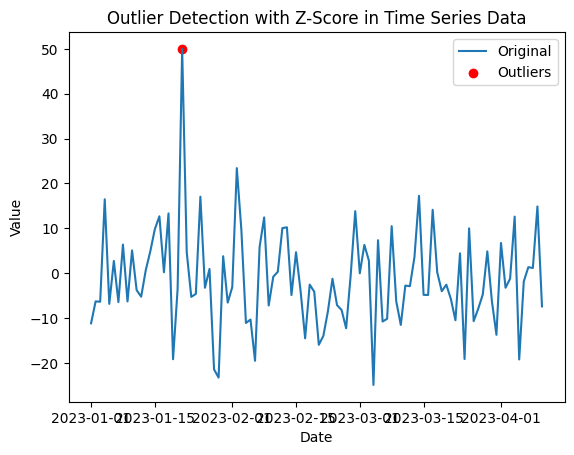

Detected Outliers:
20    50.0
Name: Value, dtype: float64


In [4]:
# 이상치 시각화 
plt.plot(data['Date'], data['Value'], label='Original')
plt.scatter(data[outliers]['Date'], data[outliers]['Value'], color='red', label='Outliers')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Outlier Detection with Z-Score in Time Series Data')
plt.legend()
plt.show()

# 이상치 출력 
outlier_values = data[outliers]['Value']
print("Detected Outliers:")
print(outlier_values)